In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import numpy as np 

import graphviz
import matplotlib.pyplot as plt 

In [6]:
# 데이터 분류 트레이닝, 테스트셋 7:3의 비율
cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                   test_size = 0.3, random_state = 123)

In [7]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
dmtrain = xgb.DMatrix(data = X_train, label = y_train)
dmtest = xgb.DMatrix(data = X_test, label = y_test)

In [10]:
params = {'max_depth':3,
         'eta':0.15,
         'objective' : 'binary:logistic',
         'eval_metric': 'logloss'}

num_rounds = 200 

In [12]:
evals = [(dmtrain, 'train'), (dmtest, 'test')]

xgb_model = xgb.train(params = params,
                     dtrain= dmtrain,
                     num_boost_round = num_rounds,
                     early_stopping_rounds = 20,
                     evals = evals)

[0]	train-logloss:0.57099	test-logloss:0.57451
[1]	train-logloss:0.47955	test-logloss:0.48623
[2]	train-logloss:0.41028	test-logloss:0.41899
[3]	train-logloss:0.35352	test-logloss:0.36577
[4]	train-logloss:0.31039	test-logloss:0.32214
[5]	train-logloss:0.26985	test-logloss:0.28471
[6]	train-logloss:0.23652	test-logloss:0.25443
[7]	train-logloss:0.20736	test-logloss:0.22961
[8]	train-logloss:0.18502	test-logloss:0.20841
[9]	train-logloss:0.16535	test-logloss:0.19150
[10]	train-logloss:0.14933	test-logloss:0.17650
[11]	train-logloss:0.13341	test-logloss:0.16348
[12]	train-logloss:0.12186	test-logloss:0.15285
[13]	train-logloss:0.10992	test-logloss:0.14367
[14]	train-logloss:0.09971	test-logloss:0.13634
[15]	train-logloss:0.09148	test-logloss:0.12734
[16]	train-logloss:0.08408	test-logloss:0.12009
[17]	train-logloss:0.07736	test-logloss:0.11427
[18]	train-logloss:0.07180	test-logloss:0.11004
[19]	train-logloss:0.06658	test-logloss:0.10437
[20]	train-logloss:0.06217	test-logloss:0.09990
[2

In [14]:
predict_probability = xgb_model.predict(dmtest)
print(np.round(predict_probability[:10],3))

[0.999 0.998 0.001 0.987 0.001 0.992 0.987 0.995 0.922 0.896]


In [19]:
predict_integer = [1 if p>0.5 else 0 for p in predict_probability]
print(predict_integer)

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [22]:
print('Accuracy : {}'.format(accuracy_score(y_test, predict_integer)))
print('Precision : {}'.format(precision_score(y_test , predict_integer)))
print('Recall : {}'.format(recall_score (y_test , predict_integer)))
# 정확도와 정밀도 재현율 뽑기 

Accuracy : 0.9766081871345029
Precision : 0.9805825242718447
Recall : 0.9805825242718447


In [23]:
import pandas as pd 

features = cancer_data.data
label = cancer_data.target

cancer_df = pd.DataFrame(data = features, columns = cancer_data.feature_names)
cancer_df['target'] = label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

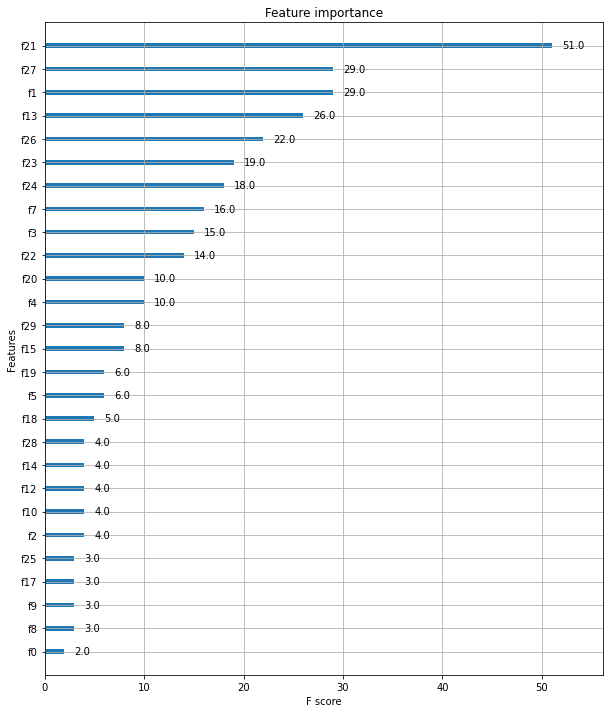

In [25]:
# 피처 관련성(중요도 선택)
fig , ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

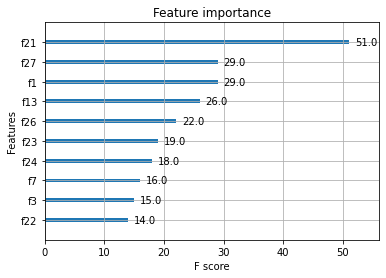

In [27]:
plot_importance(xgb_model, importance_type= 'weight', max_num_features=10)

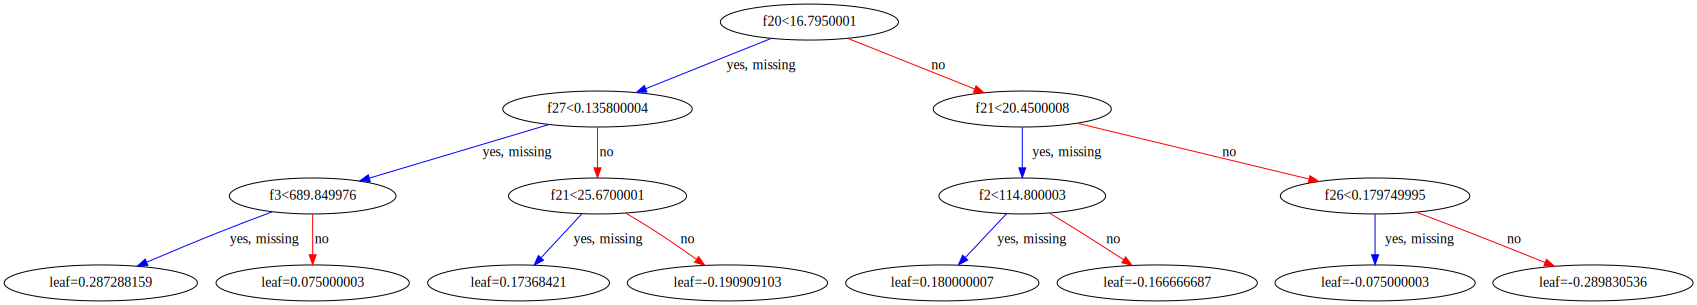

In [26]:
xgb.to_graphviz(xgb_model)